In [1]:
import pandas as pd
import numpy as np
import matplotlib as mth

In [2]:
dollar=pd.read_excel("./datas/dolarBRL2011.2021.xlsx")
barril=pd.read_excel("./datas/petroleo.2011.2021.xlsx")

# Tratamento de dos dados
- Mudança de formato para datetime
- Garantia da ordenação correta
- 
# Enriquecimento de dados
- Adição de informações
- Plotagens iniciais
- Compreensão univariada

In [3]:
dollar['V.Médio']=(dollar['Máxima']+dollar['Mínima'])/2
dollar['Data']=pd.to_datetime(dollar['Data'],format='%d/%m/%Y')
dollar.sort_values('Data',inplace=True)
dollar.set_index('Data',inplace=True)
dollar.rename_axis('Período',inplace=True)


In [4]:
barril['V.Médio']=(barril['Máxima']+barril['Mínima'])/2
barril['Data']=pd.to_datetime(barril['Data'],format='%d/%m/%Y')
barril.sort_values('Data',inplace=True)
barril.set_index('Data',inplace=True)
barril.rename_axis('Período',inplace=True)

In [5]:
dollar['VUS.Norm']=dollar['V.Médio']/dollar['V.Médio'].max()
barril['VBar.Norm']=barril['V.Médio']/barril['V.Médio'].max()

In [6]:
print(barril.isna().sum())
print(dollar.isna().sum())

Último       0
Abertura     0
Máxima       0
Mínima       0
Vol.         0
Var%         0
V.Médio      0
VBar.Norm    0
dtype: int64
Último      0
Abertura    0
Máxima      0
Mínima      0
Var%        0
V.Médio     0
VUS.Norm    0
dtype: int64


In [7]:
barril['pct_change']=barril['V.Médio'].pct_change()*100
dollar['pct_change']=dollar['V.Médio'].pct_change()*100

In [8]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

barril.dropna(inplace=True)
dollar.dropna(inplace=True)

# GERAL

In [65]:
57.17/159

0.35955974842767296

In [64]:
barril.loc['2016':,'V.Médio'].describe()

count    69.000000
mean     57.172101
std      12.750540
min      26.190000
25%      47.615000
50%      57.830000
75%      66.245000
max      80.915000
Name: V.Médio, dtype: float64

Text(0.5, 0, 'Período do controle de preço')

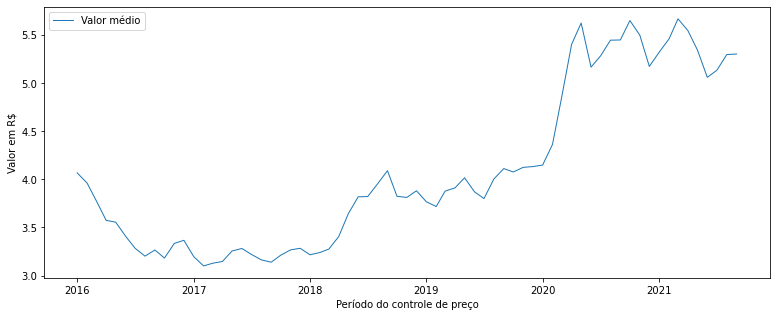

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
plt.plot(dollar.loc['2016':,'V.Médio'],markersize=8,linestyle='-',linewidth=1,label='Valor médio')
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Período do controle de preço')

In [59]:
barril.loc['2011':'2015','V.Médio'].describe()

count     59.000000
mean      96.865424
std       23.756929
min       40.580000
25%       92.442500
50%      108.480000
75%      111.547500
max      124.685000
Name: V.Médio, dtype: float64

Text(0.5, 0, 'Período do PPI')

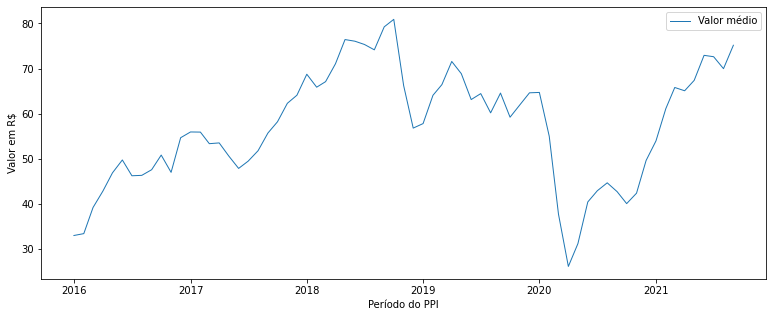

In [63]:
plt.figure(figsize=(13,5))
plt.plot(barril.loc['2016':,'V.Médio'],markersize=8,linestyle='-',linewidth=1,label='Valor médio')
plt.legend()
plt.ylabel('Valor em R$')
plt.xlabel('Período do PPI')

# CONTROLE DE PREÇO

## Dollar

10.736856921669368
-4.721767820999812


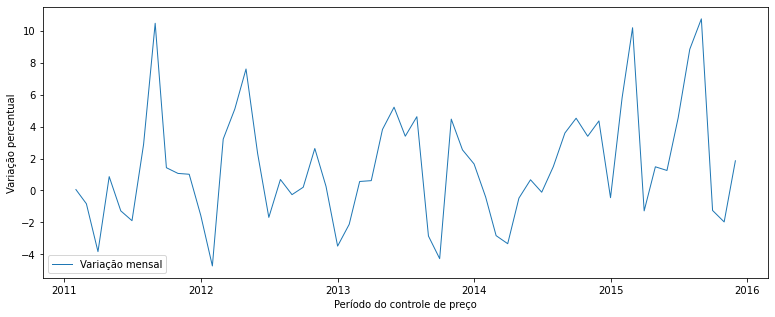

In [46]:

plt.figure(figsize=(13,5))
plt.plot(dollar.loc['2011':'2015','pct_change'],markersize=8,linestyle='-',linewidth=1,label='Variação mensal')
plt.legend()
plt.ylabel('Variação percentual')
plt.xlabel('Período do controle de preço')
print(dollar.loc['2011':'2015','pct_change'].max())
print(dollar.loc['2011':'2015','pct_change'].min())

<AxesSubplot:xlabel='Período'>

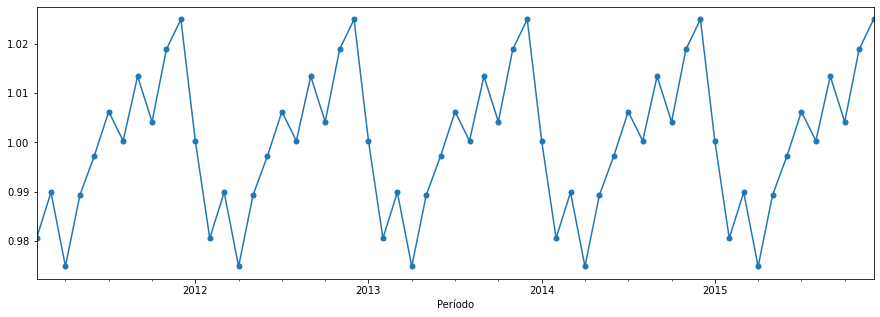

In [22]:
result=seasonal_decompose(dollar.loc[:'2015','V.Médio'],model='multiplicable',period=12)
result.seasonal.plot(figsize=(15,5),marker='o',markersize=5)

<AxesSubplot:xlabel='Período'>

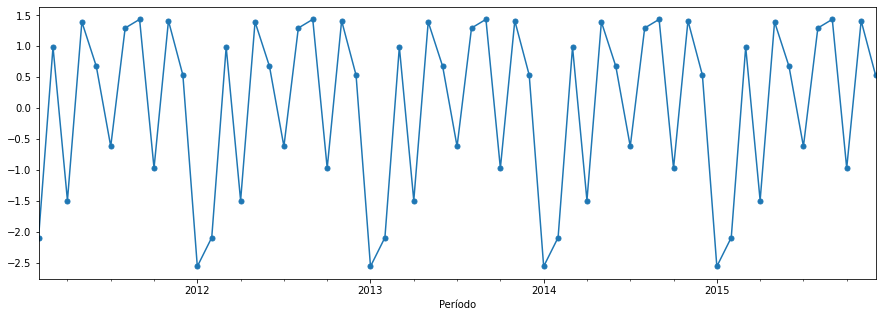

In [18]:
resultt=seasonal_decompose(dollar.loc[:'2015','pct_change'],model='additive',period=12)
resultt.seasonal.plot(figsize=(15,5),marker='o',markersize=5)
#EM TERMO DA VARIAÇÃO

<AxesSubplot:xlabel='Período'>

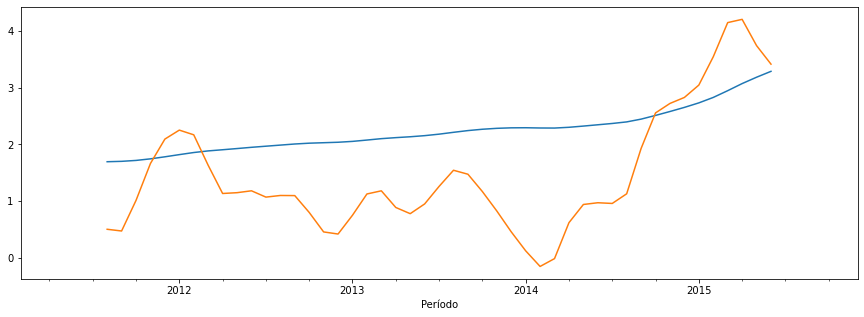

In [23]:
result.trend.plot(figsize=(15,5))
resultt.trend.plot(figsize=(15,5))

## Barril

11.952601751674386
-19.48928904067061


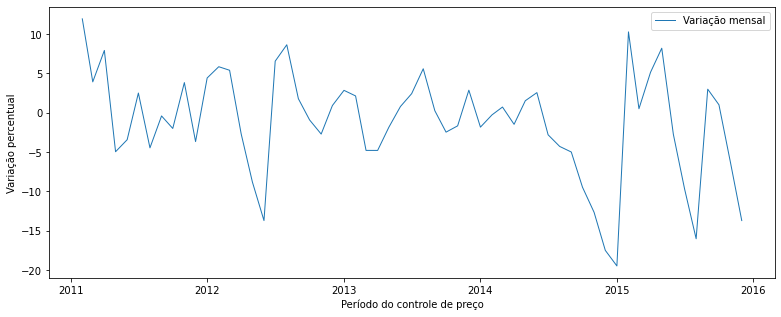

In [47]:
plt.figure(figsize=(13,5))
plt.plot(barril.loc['2011':'2015','pct_change'],markersize=8,linestyle='-',linewidth=1,label='Variação mensal')
plt.legend()
plt.ylabel('Variação percentual')
plt.xlabel('Período do controle de preço')
print(barril.loc['2011':'2015','pct_change'].max())
print(barril.loc['2011':'2015','pct_change'].min())

<AxesSubplot:xlabel='Período'>

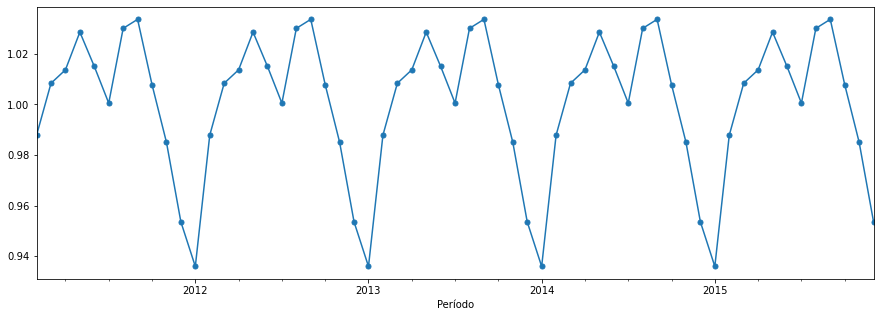

In [24]:
result2=seasonal_decompose(barril.loc[:'2015','V.Médio'],model='multiplicable',period=12)
result2.seasonal.plot(figsize=(15,5),markersize=5,marker='o')

<AxesSubplot:xlabel='Período'>

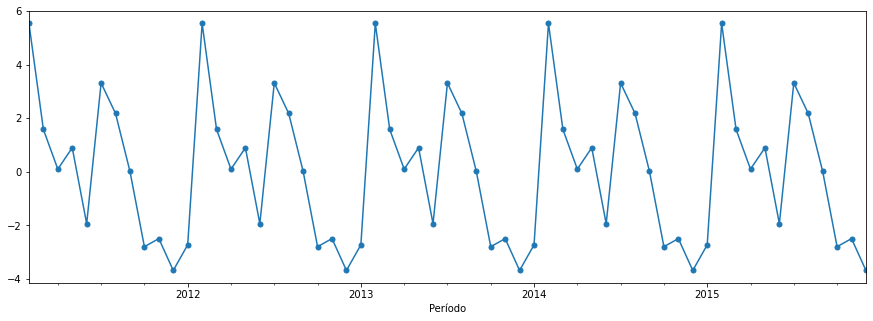

In [26]:
result22=seasonal_decompose(barril.loc[:'2015','pct_change'],model='additive',period=12)
result22.seasonal.plot(figsize=(15,5),markersize=5,marker='o')
#EM TERMO DA VARIAÇÃO

<AxesSubplot:xlabel='Período'>

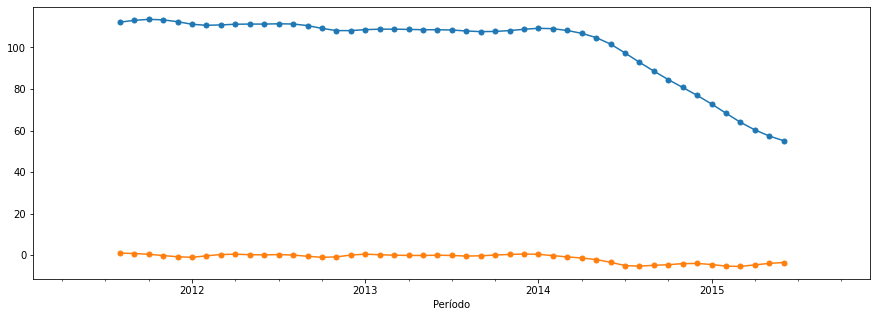

In [27]:
result2.trend.plot(figsize=(15,5),markersize=5,marker='o')
result22.trend.plot(figsize=(15,5),markersize=5,marker='o')

# PPI

## Dollar

11.282944892180357
-8.141696839221046


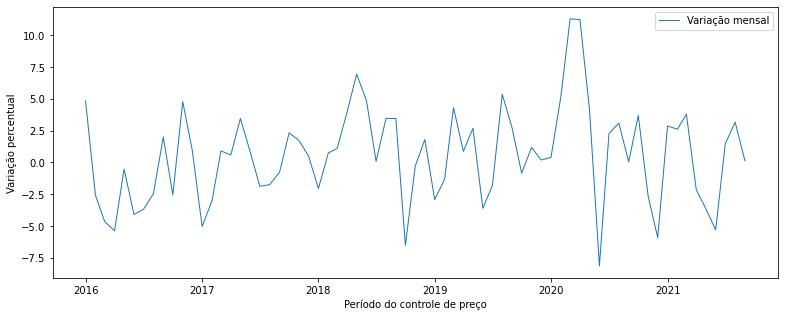

In [52]:
plt.figure(figsize=(13,5))
plt.plot(dollar.loc['2016':,'pct_change'],markersize=8,linestyle='-',linewidth=1,label='Variação mensal')
plt.legend()
plt.ylabel('Variação percentual')
plt.xlabel('Período do controle de preço')
print(dollar.loc['2016':,'pct_change'].max())
print(dollar.loc['2016':,'pct_change'].min())

<AxesSubplot:xlabel='Período'>

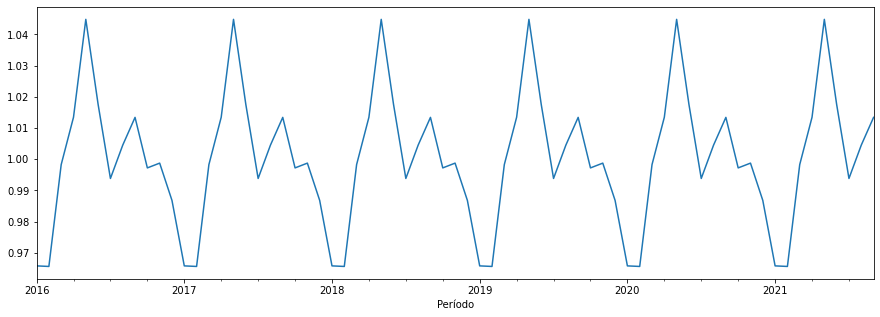

In [32]:
result3=seasonal_decompose(dollar.loc['2016':,'V.Médio'],model='multiplicable',period=12)
result3.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

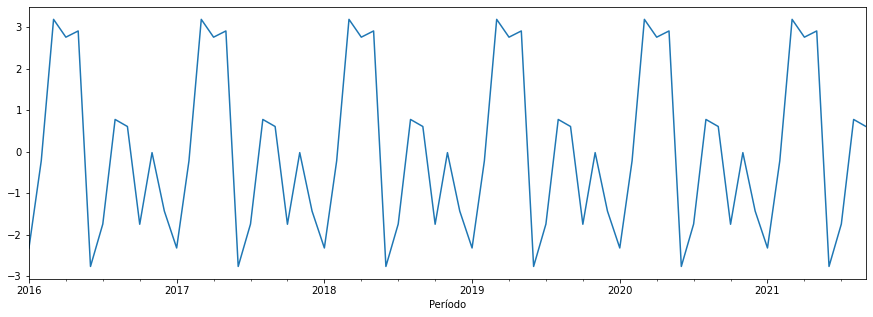

In [31]:
result33=seasonal_decompose(dollar.loc['2016':,'pct_change'],model='additive',period=12)
result33.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

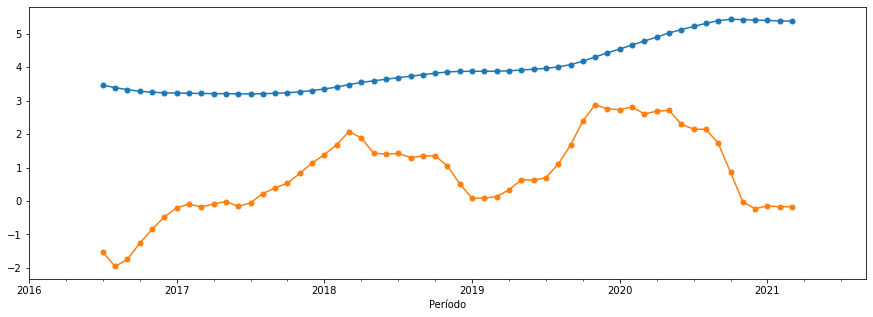

In [33]:
result3.trend.plot(figsize=(15,5),markersize=5,marker='o')
result33.trend.plot(figsize=(15,5),markersize=5,marker='o')

## Barril

29.54545454545454
-31.349386642435263


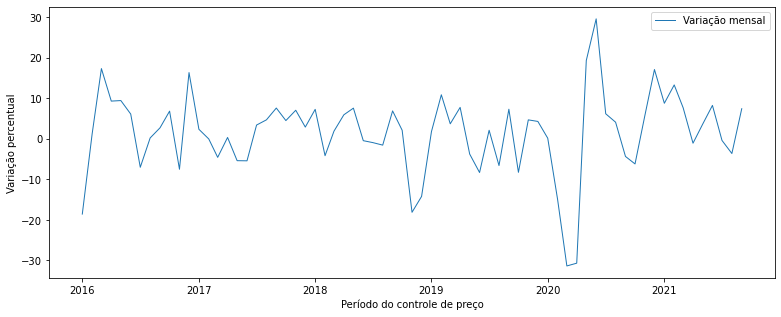

In [54]:
plt.figure(figsize=(13,5))
plt.plot(barril.loc['2016':,'pct_change'],markersize=8,linestyle='-',linewidth=1,label='Variação mensal')
plt.legend()
plt.ylabel('Variação percentual')
plt.xlabel('Período do controle de preço')
print(barril.loc['2016':,'pct_change'].max())
print(barril.loc['2016':,'pct_change'].min())

<AxesSubplot:xlabel='Período'>

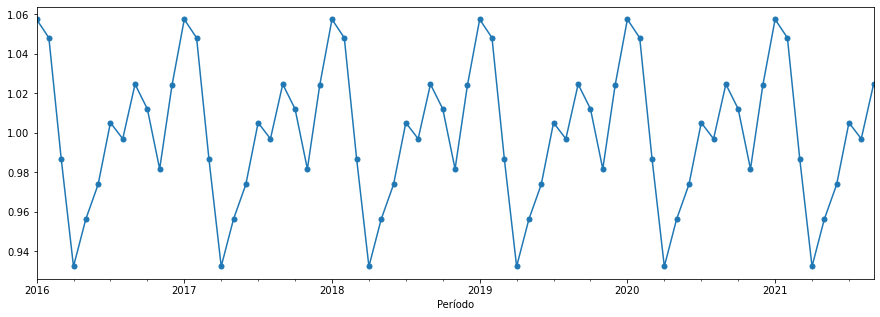

In [34]:
result4=seasonal_decompose(barril.loc['2016':,'V.Médio'],model='multiplicable',period=12)
result4.seasonal.plot(figsize=(15,5),markersize=5,marker='o')

<AxesSubplot:xlabel='Período'>

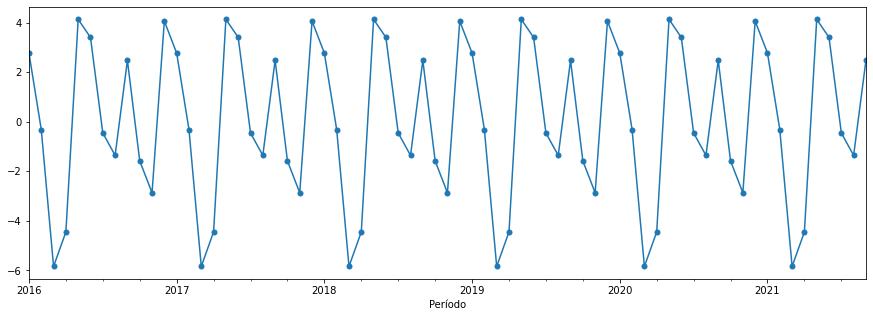

In [36]:
result44=seasonal_decompose(barril.loc['2016':,'pct_change'],model='additive',period=12)
result44.seasonal.plot(figsize=(15,5),markersize=5,marker='o')

## RESUMO PPI NORMALIZADO

In [84]:
resumo_d=seasonal_decompose(dollar.loc[:'2015','VUS.Norm'])
resumo_b=seasonal_decompose(barril.loc[:'2015','VBar.Norm'])

<AxesSubplot:xlabel='Período'>

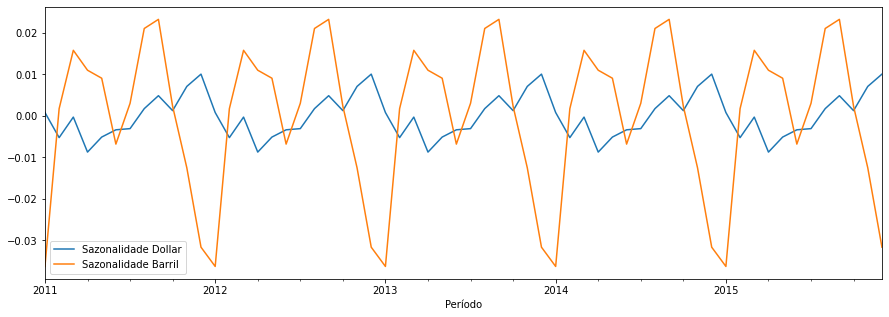

In [90]:
resumo_d.seasonal.plot(label='Sazonalidade Dollar',legend=True,figsize=(15,5))
resumo_b.seasonal.plot(label='Sazonalidade Barril',legend=True,figsize=(15,5))

In [86]:
resumo_d2=seasonal_decompose(dollar.loc['2016':,'VUS.Norm'])
resumo_b2=seasonal_decompose(barril.loc['2016':,'VBar.Norm'])

<AxesSubplot:xlabel='Período'>

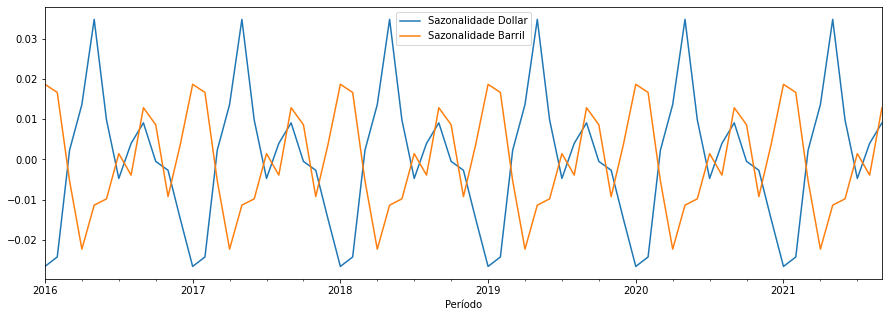

In [91]:
resumo_d2.seasonal.plot(label='Sazonalidade Dollar',legend=True,figsize=(15,5))
resumo_b2.seasonal.plot(label='Sazonalidade Barril',legend=True,figsize=(15,5))